
# Convolution Neural Networks

## Machine Learning on Images

In [1]:
from numpy.random import seed 
seed(1) 
from tensorflow import set_random_seed 
set_random_seed(2)
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Devnagari Dataset

In [2]:
X_train=np.genfromtxt('../data/x_train.csv',delimiter=",")
y_train=np.genfromtxt('../data/y_train.csv',delimiter=",")
X_test=np.genfromtxt('../data/x_test.csv',delimiter=",")
y_test=np.genfromtxt('../data/y_test.csv',delimiter=",")


In [3]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(17000, 1024) (3000, 1024) (17000,) (3000,)


In [4]:
X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0],32,32,1)
input_shape = (32,32,1)

In [5]:
X_train[0].shape

(32, 32, 1)

In [6]:
X_train=X_train.astype('float32')     ##
X_test=X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [7]:
from keras.utils.np_utils import to_categorical

In [8]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [9]:
y_train_cat[0]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [10]:
y_train_cat[1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.], dtype=float32)

In [11]:
y_train_cat.shape

(17000, 10)

## Fully Connected Model for images

In [12]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

from keras.optimizers import SGD, Adam
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import Flatten, Activation
import pandas as pd
from keras.optimizers import  Adam, Adagrad

dflist=[]
optimizers=['Adam(lr=0.01)',
           'Adagrad(lr=0.01)',
           ]
for opt_name in optimizers:
    K.clear_session()
    model=Sequential()
    model.add(Conv2D(32, (3,3), input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(1,1)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))  #fully connected
    model.add(Dense(10,activation='softmax'))  #output layer
    model.compile(loss='categorical_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h=model.fit(X_train,y_train_cat, batch_size=500, epochs=20, verbose=1, validation_data=(X_test, y_test_cat))
    dflist.append(pd.DataFrame(h.history,index=h.epoch))

Train on 17000 samples, validate on 3000 samples
Epoch 1/20
17000/17000 [==============================] - 18s 1ms/step - loss: 0.9425 - acc: 0.8234 - val_loss: 0.1033 - val_acc: 0.9713
Epoch 2/20
17000/17000 [==============================] - 18s 1ms/step - loss: 0.0616 - acc: 0.9833 - val_loss: 0.0520 - val_acc: 0.9850
Epoch 3/20
17000/17000 [==============================] - 17s 1ms/step - loss: 0.0191 - acc: 0.9954 - val_loss: 0.0481 - val_acc: 0.9870
Epoch 4/20
17000/17000 [==============================] - 18s 1ms/step - loss: 0.0056 - acc: 0.9991 - val_loss: 0.0462 - val_acc: 0.9877
Epoch 5/20
17000/17000 [==============================] - 17s 1ms/step - loss: 0.0020 - acc: 0.9997 - val_loss: 0.0478 - val_acc: 0.9880
Epoch 6/20
17000/17000 [==============================] - 17s 1ms/step - loss: 7.4556e-04 - acc: 0.9999 - val_loss: 0.0501 - val_acc: 0.9870
Epoch 7/20
17000/17000 [==============================] - 17s 989us/step - loss: 7.0842e-04 - acc: 0.9999 - val_loss: 0.0517 

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [14]:
# We know that MNIST images are 28 pixels in each dimension.
img_size =32

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

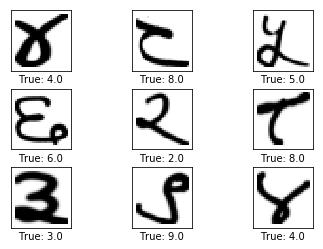

In [15]:
# Get the first images from the test-set.
images = X_train[0:9]

# Get the true classes for those images.
cls_true = y_train[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [21]:
predictions = model.predict(X_test)


In [23]:
y_pred= np.argmax(predictions, axis=-1)   
print(y_pred)

[7 1 8 ..., 0 6 8]


In [24]:
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test,y_pred))


EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       300
        1.0       1.00      0.99      0.99       300
        2.0       0.96      0.98      0.97       300
        3.0       0.99      0.98      0.98       300
        4.0       0.99      0.99      0.99       300
        5.0       0.99      0.98      0.99       300
        6.0       0.99      0.99      0.99       300
        7.0       0.99      0.99      0.99       300
        8.0       0.99      1.00      1.00       300
        9.0       1.00      0.99      0.99       300

avg / total       0.99      0.99      0.99      3000



In [25]:
print ("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

Confusion matrix
[[300   0   0   0   0   0   0   0   0   0]
 [  0 298   0   0   0   0   1   0   1   0]
 [  0   1 294   2   1   0   1   1   0   0]
 [  0   0   6 293   0   0   0   1   0   0]
 [  0   0   0   0 297   1   1   0   0   1]
 [  0   0   2   1   2 295   0   0   0   0]
 [  0   0   1   0   0   0 298   1   0   0]
 [  0   0   1   0   0   1   0 298   0   0]
 [  0   0   0   0   0   0   0   0 300   0]
 [  0   0   1   0   0   0   1   0   1 297]]


In [26]:
print(y_test)
print(y_pred)

[ 7.  1.  8. ...,  0.  6.  8.]
[7 1 8 ..., 0 6 8]
